# Welcome to the Analyst Tool notebook! 
You can use this notebook to: <br/>
1) Search for tweets based on a keyword, and cross-check your results with Graphika's map data <br/>
2) Run a Map Activity Report <br/>
3) Run a Feature Activity Report <br/>
4) Run a Bot Activity Report <br/>
5) Get group densities for a given map ID <br/>
6) Check trending hits across Graphika data <br/>
7) Run Botometer for a given map ID <br/>


### Before getting started, run this cell to connect to the Graphika API
You may need to run this cell again to refresh your connection!

In [191]:
%run connect_to_api.ipynb

### Next, run this cell to get all the necessary functions in place

In [222]:
%run misc_functions.ipynb
%run tweepy_tweets_getter.ipynb
%run activity_counter.ipynb
%run bot_activity.ipynb
%run group_density_getter.ipynb
%run graphika_trending.ipynb
%run botometer.ipynb
%run hit_getter.ipynb

## Tweet Search
### Run this cell to conduct your initial search

In [188]:
search_hit = input('Enter your search term: ')
search_limit = int(input('Enter how many 100s of tweets you want to retrieve: '))

search_result = search_tweets (search_hit, limit = search_limit)

Enter your search term: \"Don’t worry, Mr. President. I’ll see you\"
Enter how many 100s of tweets you want to retrieve: 12
..Fetching 1200 tweets
...Done!


### Now that you have your search results, you can run this cell to see the table

In [189]:
search_result

,retweet_screen_name,retweet_tweet_id,user_id,retweet,text,author,screen_name,tweet_id,time,mentions,hashtags,urls
0,KamalaHarris,1202008446083698689,180497735,True,"Don’t worry, Mr. President. I’ll see you at yo...",RESIST! 🌊,lindhays,1247222454138765312,2020-04-06 17:59:39,[KamalaHarris],[],[https://twitter.com/realDonaldTrump/status/12...
1,KamalaHarris,1202008446083698689,17787826,True,"Don’t worry, Mr. President. I’ll see you at yo...","Hillcrest Guest House, St. John US VI 🏖🌊🦀",hillcreststjohn,1246391069648007170,2020-04-04 10:56:02,[KamalaHarris],[],[]


### Or run this cell to print the results to a CSV!

In [174]:
print_csv(search_result)

Enter filename: n
n.csv stored to the same directory as this file!


In [182]:
# Print 2D and 3D plots by lighting up nodes
import seabiscuit as sb
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

temp = pd.DataFrame(sb.Nodes(2211))
shades = []
sizes = []
for node in temp.node_source_id.values.tolist():
#     print(type(node))
    if int(node) in search_result.user_id.values.tolist():
#         print(temp[temp.node_source_id == node])
    
        shades.append('red')
        sizes.append(500)
    else:
        shades.append('grey')
        sizes.append(2)
        
fig = plt.figure()
ax = plt.axes(projection='3d')
# , cmap='Greens'
ax.scatter3D(x, y, z, s = sizes, c=shades)

x,y,z = zip(*temp.coords_3d)

2020-04-06 11:54:55,125 - seabiscuit - ERROR - url: https://api.graphika.com/maps/2211/nodes PermissionDenied: status code: 403, text: You do not have permissions to access this resource!

2020-04-06 11:54:55,125 - seabiscuit - ERROR - url: https://api.graphika.com/maps/2211/nodes PermissionDenied: status code: 403, text: You do not have permissions to access this resource!

2020-04-06 11:54:55,125 - seabiscuit - ERROR - url: https://api.graphika.com/maps/2211/nodes PermissionDenied: status code: 403, text: You do not have permissions to access this resource!

2020-04-06 11:54:55,129 - seabiscuit - ERROR - url: https://api.graphika.com/maps/2211/nodes Caught an Exception using API: status code: 403, text: You do not have permissions to access this resource!

2020-04-06 11:54:55,129 - seabiscuit - ERROR - url: https://api.graphika.com/maps/2211/nodes Caught an Exception using API: status code: 403, text: You do not have permissions to access this resource!

2020-04-06 11:54:55,129 - sea

skipping url: https://api.graphika.com/maps/2211/nodes


SystemExit: Exiting:  Could not recover from errors

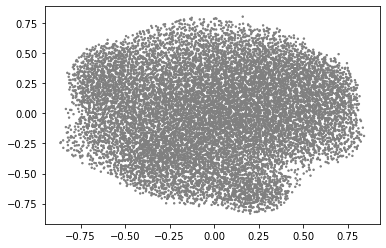

In [180]:
plt.scatter(x[:13800],y[:13800], s=sizes[:13800], color=shades[:13800])

### If you would like to cross-check your results with Graphika data, run this cell!
This cell will identify how many unique nodes were returned, and how those nodes were spread out across Graphika's maps

In [134]:
graphika_results = check_graphika_data(search_result)

From this search, 908 nodes were returned
**Permission denied for map 1661**
**Permission denied for map 2211**
**Permission denied for map 2305**
The map that have the most of these nodes are 
Unknown 
Unknown 
and Unknown


,count,percent
1661,287,44.634526
2211,100,15.552100
2305,48,7.465008
1909,46,7.153966
1995,43,6.687403
2181,32,4.976672
2158,30,4.665630
2184,15,2.332815
1713,10,1.555210
2320,10,1.555210


>> Would you like to save a table of which maps these nodes appear in? (y/n) 
n


## Map Reports
Note that these reports may take some time to generate! However, if you have just run a report on a map ID, re-running it will take less time, as this tool caches the data.
### Run this cell to get a Map Activity Report

In [76]:
run_map_activity_report(debug = True)

>> Enter map id: 2232
...Fetching map data
...Getting map nodes
...Getting hits
...Querying database
...Morphing dataframe
...Merging nodes with hits
...Done!
count by group, cluster, or account: cluster


,cluster_tweet_count
cluster_name,
US Left-Wing|Resist Support,635
US Mainstream|Left-Wing Pols|Commentators|Journos,255
US Disney|Star Wars|Movies Directors|Actors,110


>> Do you want to save this result to a CSV? (y/n) 
n


### Run this cell to get a Feature Activity Report

In [27]:
run_feature_activity_report(debug = True)

>> Enter map id: 2232
>> Search for hashtags, urls, or retweets: hashtags
>> Is this search case sensitive? (y/n) 
n
>> Comma separate search parameters, or hit enter for all: 
...Searching hashtags for <>
>> Do you want to save the search results to a CSV? (y/n)n


,number_of_tweets
screen_name,
Rodstyme,100


>> Do you want to save the above table to a CSV? (y/n)n


### Run this cell to get a Bot Activity Report

In [128]:
run_bot_activity_report(debug = True)

## Group Densities
### Run this cell to get group densities for a given map ID

In [69]:
get_group_density()

Please enter a map ID: 2232


,nodes,arcs,density
Other Left-Leaning Media|MSM,3601,10521,0.081135
Anti-Trump,3007,222273,2.458215
Entertainment,2131,2834,0.062407
Pro-Trump,1883,66227,1.867818
Other,1322,3834,0.219376


>> Would you like to save these results to a CSV? (y/n) 
n


## Graphika Trending
The following cells scan Graphika's live maps for trending hashtags, URLs, and media on Twitter

### Run this cell to search Graphika's live maps for trending Twitter hashtags, URLs, or media, and run the next one to see the results

In [192]:
trend_result = graphika_trending()

>> Enter how many days of trending hits you would like to pull: 2
>> Enter the type of hit you would like to explore (hashtags,urls,media): hashtags
...Looking at live maps:
NFL_Live_Landscape_v2
India General Political Landscape TW 2019
Hot97_Landscape
NFL_Fan_Landscape_V3
Iran_Politics_Culture
Philippines_ABS-CBN_Media
JPA_Immunology
Climate Change Combined Landscape
NCCIH 2020
Taiwan_Landscape_2019
M1948 ZP_2019RussianProtests
Oncology_2019_1554228412
Emotional_Rescue_Mentions_2
Philippines_ABS-CBN_Political
Emotional_Rescue_Followers
T-Systems Security Map (DE Fokus)
T-Systems Cloud Map (INT Fokus)
Atlanta_Georgia
T-Systems Connectivity Map (INT Fokus)
Anti-Modi_Pakistan
Russia_political_landscape
starwars_2017
StarWars_fol
Craft_Beer
...Computing map counts
...Done!
>> Do you want to save these results to a CSV? (y/n) 
y
Enter filename: apr7
apr7.csv stored to the same directory as this file!


In [39]:
trend_result

### Run this cell to get a summary of those results, and the next one to see the summary

In [193]:
trend_summary = get_top_x_trends(trend_result,20)

...Getting a summary of top 20 hits
...Done!


In [194]:
trend_summary

,hit_count,hit_share,tweet_count,tweet_share,map_count,node_count,node_share
hit_value,,,,,,,
coronavirus,10298,4.49,6422,6.38,24,1871,8.63
COVID19,7889,3.44,6438,6.39,24,3109,14.35
stop,6524,2.84,3135,3.11,5,2,0.01
WrestleMania,2590,1.13,2238,2.22,17,523,2.41
Coronavirus,1506,0.66,1259,1.25,24,803,3.71
Covid_19,1255,0.55,1142,1.13,24,851,3.93
Nowplaying,1007,0.44,536,0.53,4,3,0.01
dremtgi,1005,0.44,533,0.53,2,1,0.00
dremstuff,1005,0.44,533,0.53,2,1,0.00


### Run this cell to search all the returned hits for yourself

In [202]:
trend_search = search_trends(trend_result)

### Run this cell to get the summary of a specific hit

In [221]:
summarize_hit(trend_summary,trend_result)

>> Enter a hit to get its summary: BillGatesIsEvil
--------------------
BillGatesIsEvil SUMMARY
**This is not a top hit**
...Getting the metadata of accounts that appeared across multiple maps for this hit:
These accounts break down as follows:


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/algorithms.py:802: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  keys, counts = f(values, dropna)


,tag
US Right,5
"[US Right, US Right]",1
SMM,1
Mainstream Media,1
Alt Media/Conspiracy,1


,map_type,cluster_no,group_no,node_id,username,website,account_url,description,profile_image_url,account_created_at,cluster_id,coords_2d,coords_3d,radius,global_in_degree,global_out_degree,map_in_degree,map_out_degree,map_union_degree,num_tweets,verified,listed_count,favourites_count,protected,influencer,tag,map_id
name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cathy,twitter,44,1,187782838,cathyspartanj,,twitter.com/cathyspartanj,"""All Posts Are Made By My Own Views Through S...",http://pbs.twimg.com/profile_images/6390195141...,2010-09-07 03:46:47,8099,"[0.6821035746585753, 0.147960778024705]","[-0.7380395104, -0.07234907230000001, -0.09513...",5.147158,26201,28748,1757,2045,2388,449875,false,137,220750,false,True,US Right,1518
STOP THE INDOCTRINATION IN SCHOOLS AND MEDIA,twitter,2,1,1849839132,6549lmartin,,twitter.com/6549lmartin,I am not a hyphenated American I AM AN AMERICA...,http://pbs.twimg.com/profile_images/1170664323...,2013-09-10 00:33:21,8108,"[0.7632190398116323, 0.142834348148285]","[-0.7493593208, -0.1526148852, -0.2259964893]",4.739009,34719,33844,1505,1538,2001,505426,false,173,67461,false,True,"[US Right, US Right]",1518
"C0RRUPTI0N, USA 🧨🔥",twitter,18,1,1122600787,C0RRUPTI0N_USA,http://corruption-usa.com,https://t.co/BEoH9PNgd4,"Library of Truth. Patriots, read the books! Fi...",,2013-01-26 17:08:16,45969,"[0.8124981147999999, -0.3726371756]","[-0.9101396996, 0.1898058237, -0.2487574404]",2.547064,80084,75129,353,140,355,33991,false,205,45803,false,True,US Right,2353
"Dr. Thomas Paul, Therapist #MindBody",twitter,56,6,1558861508,DrThomasPaul,https://www.PastLifeRegression.com/,https://t.co/oWIkOJ1sQa,"Past Life Regression Center® Founder, Therapis...",http://pbs.twimg.com/profile_images/1161002245...,2013-06-30 20:22:18,8081,"[0.09105220191017584, 0.08340582601371939]","[-0.1086599183, -0.2692692362, -0.1258668419]",4.018134,63689,55648,1296,574,1401,63664,false,680,29493,false,True,SMM,1518
Debsjj,twitter,8,9,2633885004,deborahj77,,twitter.com/deborahj77,Truth seeker. Hate the lies of governments and...,,2014-07-13 00:57:03,7951,"[0.1281801214056812, -0.1157184667511046]","[-0.2122072955, 0.132109283, 0.3157250742]",2.112634,1159,3093,114,72,115,6455,false,3,19310,false,False,Alt Media/Conspiracy,1527
Cathy,twitter,51,1,187782838,cathyspartanj,,twitter.com/cathyspartanj,"""All Posts Are Made By My Own Views Through S...",http://pbs.twimg.com/profile_images/6390195141...,2010-09-07 03:46:47,7952,"[0.8736339727129068, -0.04618723569962979]","[-0.8536242203, 0.0820569737, 0.1155109584]",3.882516,26201,28748,643,461,686,449875,false,137,220750,false,True,US Right,1527
🇺🇸LadyMacBeth 4 Trump🇺🇸,twitter,16,1,1747038559,ladymacbeth1212,,twitter.com/ladymacbeth1212,#USMC wife of👉🏻@SwampFox357❤️#Patriot #DrainTh...,,2013-09-07 13:01:39,8126,"[0.8554660254891051, -0.04353111337793847]","[-0.7117426453, 0.2525037322, -0.3412078462]",4.609105,18262,19542,1237,1719,1885,42706,false,89,24621,false,True,US Right,1518
"C0RRUPTI0N, USA 🧨🔥",twitter,21,1,1122600787,C0RRUPTI0N_USA,http://corruption-usa.com,https://t.co/BEoH9PNgd4,"Library of Truth. Patriots, read the books! Fi...",,2013-01-26 17:08:16,8094,"[0.5447981552425043, -0.06167604494263457]","[-0.5589948549, -0.3316457853, 0.0608927610000...",4.610242,80084,75129,1539,1506,1886,33991,false,205,45803,false,True,US Right,1518
"C0RRUPTI0N, USA 🧨🔥",twitter,9,17,1122600787,C0RRUPTI0N_USA,http://corruption-usa.com,https://t.co/BEoH9PNgd4,"Library of Truth. Patriots, read the books! Fi...",,2013-01-26 17:08:16,43801,"[0.3686093314000001, -0.1124847796]","[-0.1939072204, -0.5602304179, 0.354271068]",2.340836,80084,75129,354,2,354,33991,false,205,45803,false,True,Mainstream Media,2249


## Botometer
Run the following cell to execute the Botometer on a given map ID

In [126]:
run_botometer()

    Eventually can we create a single file(/s) containing all passwords and Api creds

    Tweet search - Can we add logical Ops like “AND” and “Or”?  

    Print csv:  can we save to a Downloads folder rather than Git file. Otherwise we’re likely to run into trouble eventually with people pushing cvs

    Print csv: tweet id is automatically formatted as Scientific Notation. (I’ve gotten around this by formatting as string and writing to xlsx)

    Saving to csv for search results needs screen names, cluster names and map names. Talk to Rodrigo…. do you have this access?

    feature activity report: We need a contains or exact search; ex, maga == EthicMagazine ; can we add cluster and group names to screen_names for csv export?